# <center>DECISION TREE</center>

#Non Parametric ML model are where formulae is not created Eg:- Descision Tree
#Parametric are where the formuale is created eg :- Linear or Logistic 

#when splitting the value count in a tree a final count reaches 0 that decision node is PURE STATE or PURE SUBSET

#Advantages of DT:- Can track the path of a decision
#DisAdvantage of DT :- Too many features model will cause overfitting due to overgrown trees 

#### Taking Care that model dosent overfit 
1)Selection of Significant Features <br>
2) Prune of Dt  Chopping of Unwanted features<br>
3)Hyper-Parameter-Tuning(HPT) 

##### Hyper Parameter Tuning 
What steps can be taken to Tune the tree <br>
1)Controlling the height of the tree <br>
2)Controlling the feature i.e Significant features <br>
3)Controlling both 1 & 2<br>
4)CP(Complexity Parameter) ---> Signifys quality of the split<br>
5)Minimum samples for a subset condition
<img src="160.png" width="50" height="20">

### Split Criteria 
It is done by 2 methods<br>
1)Entropy <br>
2)Information Gain

### 2 Types of DT are :-
1)Entropy Model <br> 
2)Gini Model (Also a HPT) <br>

##### DATASET : e.Coli

In [39]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_selection import RFE 
# RFE = Recursive Feature Selection (for feature selection)
from sklearn import tree
import matplotlib.pyplot as plt

In [40]:
filename = "ecoli.csv"

In [41]:
ecoli = pd.read_csv(filename)

In [42]:
print(ecoli)

    sequence_name   mcg   gvh   lip  chg   aac  alm1  alm2 lsp
0       AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1      ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2      ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3      ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4       ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp
..            ...   ...   ...   ...  ...   ...   ...   ...  ..
331    TREA_ECOLI  0.74  0.56  0.48  0.5  0.47  0.68  0.30  pp
332    UGPB_ECOLI  0.71  0.57  0.48  0.5  0.48  0.35  0.32  pp
333    USHA_ECOLI  0.61  0.60  0.48  0.5  0.44  0.39  0.38  pp
334    XYLF_ECOLI  0.59  0.61  0.48  0.5  0.42  0.42  0.37  pp
335    YTFQ_ECOLI  0.74  0.74  0.48  0.5  0.31  0.53  0.52  pp

[336 rows x 9 columns]


In [43]:
#rows and columns
ecoli.shape

(336, 9)

In [44]:
#Look for data types 
ecoli.dtypes

sequence_name     object
mcg              float64
gvh              float64
lip              float64
chg              float64
aac              float64
alm1             float64
alm2             float64
lsp               object
dtype: object

In [45]:
ecoli.sequence_name.unique()

array(['AAT_ECOLI', 'ACEA_ECOLI', 'ACEK_ECOLI', 'ACKA_ECOLI', 'ADI_ECOLI',
       'ALKH_ECOLI', 'AMPD_ECOLI', 'AMY2_ECOLI', 'APT_ECOLI',
       'ARAC_ECOLI', 'ASG1_ECOLI', 'BTUR_ECOLI', 'CAFA_ECOLI',
       'CAIB_ECOLI', 'CFA_ECOLI', 'CHEA_ECOLI', 'CHEB_ECOLI',
       'CHEW_ECOLI', 'CHEY_ECOLI', 'CHEZ_ECOLI', 'CRL_ECOLI',
       'CSPA_ECOLI', 'CYNR_ECOLI', 'CYPB_ECOLI', 'CYPC_ECOLI',
       'CYSB_ECOLI', 'CYSE_ECOLI', 'DAPD_ECOLI', 'DCP_ECOLI',
       'DDLA_ECOLI', 'DDLB_ECOLI', 'DEOC_ECOLI', 'DLDH_ECOLI',
       'EFG_ECOLI', 'EFTS_ECOLI', 'EFTU_ECOLI', 'ENO_ECOLI', 'FABB_ECOLI',
       'FES_ECOLI', 'G3P1_ECOLI', 'G3P2_ECOLI', 'G6PI_ECOLI',
       'GCVA_ECOLI', 'GLNA_ECOLI', 'GLPD_ECOLI', 'GLYA_ECOLI',
       'GSHR_ECOLI', 'GT_ECOLI', 'HEM6_ECOLI', 'HEMN_ECOLI', 'HPRT_ECOLI',
       'IF1_ECOLI', 'IF2_ECOLI', 'ILVY_ECOLI', 'IPYR_ECOLI', 'KAD_ECOLI',
       'KDSA_ECOLI', 'LEU3_ECOLI', 'LON_ECOLI', 'LPLA_ECOLI',
       'LYSR_ECOLI', 'MALQ_ECOLI', 'MALZ_ECOLI', 'MASY_ECOLI',
       'METB_E

In [46]:
#Since the sequence_name is a string column drop the column
ecoli.drop(columns="sequence_name" ,inplace=True)

In [47]:
cols = ecoli.columns
print(cols)

Index(['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'lsp'], dtype='object')


In [48]:
ecoli.tail(30)

,mcg,gvh,lip,chg,aac,alm1,alm2,lsp
306,0.63,0.71,0.48,0.5,0.60,0.40,0.39,pp
307,0.71,0.86,0.48,0.5,0.40,0.54,0.32,pp
308,0.68,0.78,0.48,0.5,0.43,0.44,0.42,pp
309,0.64,0.84,0.48,0.5,0.37,0.45,0.40,pp
310,0.74,0.47,0.48,0.5,0.50,0.57,0.42,pp
311,0.75,0.84,0.48,0.5,0.35,0.52,0.33,pp
312,0.63,0.65,0.48,0.5,0.39,0.44,0.35,pp
313,0.69,0.67,0.48,0.5,0.30,0.39,0.24,pp
314,0.70,0.71,0.48,0.5,0.42,0.84,0.85,pp
315,0.69,0.80,0.48,0.5,0.46,0.57,0.26,pp


In [49]:
#As the data is stored according to y variable we will shuffle the data
ecoli = ecoli.sample(frac = 1)

In [50]:
ecoli.tail(30)

,mcg,gvh,lip,chg,aac,alm1,alm2,lsp
281,0.71,0.46,1.00,0.5,0.52,0.59,0.30,omL
48,0.42,0.35,0.48,0.5,0.58,0.15,0.27,cp
290,0.67,0.70,0.48,0.5,0.46,0.45,0.33,pp
263,0.67,0.84,0.48,0.5,0.74,0.54,0.37,om
71,0.44,0.51,0.48,0.5,0.47,0.26,0.36,cp
322,0.62,0.78,0.48,0.5,0.47,0.49,0.54,pp
212,0.46,0.59,0.48,0.5,0.36,0.76,0.23,im
191,0.63,0.65,0.48,0.5,0.66,0.67,0.71,im
181,0.70,0.40,0.48,0.5,0.56,0.86,0.83,im
112,0.35,0.34,0.48,0.5,0.46,0.30,0.27,cp


In [51]:
# Get the Y-variable class distribution
ecoli.lsp.value_counts()

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: lsp, dtype: int64

In [52]:
#split the data train and test 
trainx,testx,trainy,testy = train_test_split(ecoli.drop("lsp",1),ecoli.lsp,test_size=0.25)

C:\Users\YASHPU~1\AppData\Local\Temp/ipykernel_3628/421530966.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainx,testx,trainy,testy = train_test_split(ecoli.drop("lsp",1),ecoli.lsp,test_size=0.25)


In [53]:
print("trainx = {}, trainy = {}".format(trainx.shape, trainy.shape))
print("testx = {}, testy = {}".format(testx.shape, testy.shape))

trainx = (252, 7), trainy = (252,)
testx = (84, 7), testy = (84,)


In [54]:
len(set(trainy))

7

In [55]:
len(set(testy))

8

In [56]:
#Build Decision Tree Model 
#Set 1 --> wihtout hyper parameter tuning
#Entropy Model
m1_ent = dtc (criterion="entropy").fit(trainx,trainy)

In [57]:
#Build the Gini Model
m1_gini = dtc(criterion="gini").fit(trainx,trainy)

In [58]:
#plot the decision tree
#features  = columns of training data 
#classes = unique classes of the training data 
#fig = plt.figure(figsize=(300,150))
#tree.plot_tree(m1_ent,
 #             feature_names=trainx.columns,
  #            class_names=trainy.unique(),
   #           filled = True)

In [59]:
p1_ent = m1_ent.predict(testx)

In [60]:
p1_gini = m1_gini.predict(testx)

In [61]:
#Compare the accuracy of the two models 
print("Accuracy Score of entropy model ={}".format(accuracy_score(testy,p1_ent)))
print("Accuracy Score of Gini model ={}".format(accuracy_score(testy,p1_gini)))

Accuracy Score of entropy model =0.7738095238095238
Accuracy Score of Gini model =0.7142857142857143


In [24]:
#Classification Report (Class wise prediction)
print("CR for Entropy model....")
print(classification_report(testy,p1_ent,zero_division=0))

CR for Entropy model....
              precision    recall  f1-score   support

          cp       0.93      0.93      0.93        40
          im       0.80      0.91      0.85        22
         imL       0.00      0.00      0.00         1
         imU       1.00      0.57      0.73         7
          om       0.33      0.33      0.33         3
         omL       0.50      1.00      0.67         1
          pp       0.70      0.70      0.70        10

    accuracy                           0.83        84
   macro avg       0.61      0.63      0.60        84
weighted avg       0.83      0.83      0.83        84



In [25]:
print("CR for Gini model....")
print(classification_report(testy,p1_gini,zero_division=0))

CR for Gini model....
              precision    recall  f1-score   support

          cp       0.93      0.97      0.95        40
          im       0.86      0.86      0.86        22
         imL       0.00      0.00      0.00         1
         imU       1.00      0.29      0.44         7
          om       0.50      0.33      0.40         3
         omL       0.50      1.00      0.67         1
          pp       0.54      0.70      0.61        10

    accuracy                           0.82        84
   macro avg       0.62      0.59      0.56        84
weighted avg       0.84      0.82      0.81        84



In [26]:
#HYPer PARAMETER TUNING using GRID search
from sklearn.model_selection import GridSearchCV

In [27]:
#Create the instacne of Decision Tree Classifier 
dtclf = dtc()

In [28]:
params = {"criterion": ['entropy','gini'],
          "max_depth":np.arange(2,6),
         "min_samples_leaf":np.arange(3,10),
         "max_features":np.arange(2,6)
         }

In [29]:
#Perform the Grid Search
grid1 = GridSearchCV(dtclf,
                     param_grid=params,
                    scoring='accuracy',
                    n_jobs=-1,
                    cv = 5).fit(trainx,trainy)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [30]:
#Find out the Best Parameter 
print(grid1.best_params_)
print(grid1.best_score_)
print(grid1.best_estimator_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 5}
0.8334901960784313
DecisionTreeClassifier(max_depth=4, max_features=5, min_samples_leaf=5)


In [31]:
#Model 2 with hyper parameter tuning 
m2 = dtc(criterion="gini", max_depth=4, max_features=4, min_samples_leaf=5).fit(trainx,trainy)

In [32]:
p2 = m2.predict(testx)

In [33]:
print("Accuracy Score for m2 ={}" .format(accuracy_score(testy,p2)))

Accuracy Score for m2 =0.8214285714285714


In [34]:
pd.crosstab(testy,p2,margins=True)

col_0,cp,im,imU,om,omL,pp,All
lsp,,,,,,,
cp,39,0,0,0,0,1,40
im,1,20,0,0,1,0,22
imL,0,0,0,0,0,1,1
imU,0,5,2,0,0,0,7
om,0,0,0,0,0,3,3
omL,0,0,0,1,0,0,1
pp,2,0,0,0,0,8,10
All,42,25,2,1,1,13,84


In [35]:
#Classification Report 
print(classification_report(testy,p2,zero_division=0))

              precision    recall  f1-score   support

          cp       0.93      0.97      0.95        40
          im       0.80      0.91      0.85        22
         imL       0.00      0.00      0.00         1
         imU       1.00      0.29      0.44         7
          om       0.00      0.00      0.00         3
         omL       0.00      0.00      0.00         1
          pp       0.62      0.80      0.70        10

    accuracy                           0.82        84
   macro avg       0.48      0.42      0.42        84
weighted avg       0.81      0.82      0.80        84



In [36]:
#Feature Selection 
    #Check for Singularities 'chg' & 'lip'
print(ecoli.chg.value_counts())    
print(ecoli.lip.value_counts())

0.5    335
1.0      1
Name: chg, dtype: int64
0.48    326
1.00     10
Name: lip, dtype: int64


In [37]:
#Important Features of the model
df_features = pd.DataFrame({'feature':trainx.columns,
                           'importance':m2.feature_importances_})
df_features = df_features.sort_values('importance',ascending=False)
print(df_features)

  feature  importance
5    alm1    0.359495
1     gvh    0.302237
0     mcg    0.190649
4     aac    0.116241
2     lip    0.026579
6    alm2    0.004800
3     chg    0.000000


### CCP
CP also called as CCP(Cost complexity Parameter)<br>
The least CP value found it all the nodes of is the best CP value<br>


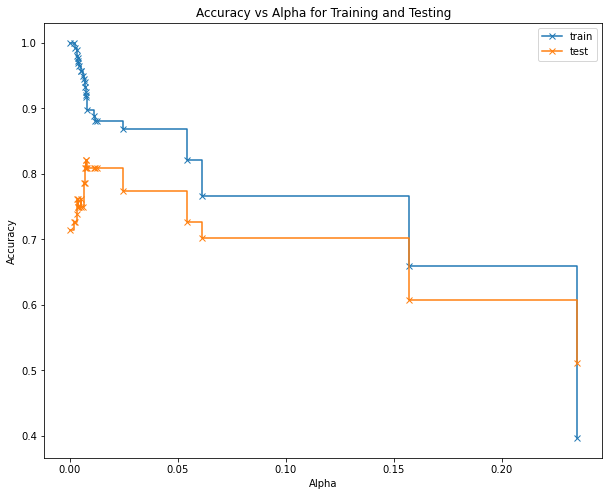

In [74]:
# pruning the tree

# find the nodes that have the weakest link

path = m1_gini.cost_complexity_pruning_path(trainx,trainy)
alphas,impurities = path.ccp_alphas,path.impurities

clfs=[]

for a in alphas:
    model = dtc(ccp_alpha=a).fit(trainx,trainy)
    clfs.append(model)
    
clfs

train_score = [clf.score(trainx,trainy) for clf in clfs]
test_score = [clf.score(testx,testy) for clf in clfs]

# plot the train and test scores
fig,ax = plt.subplots(figsize=(10,8))
# fig = plt.figure(figsize=(10,5))
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for Training and Testing")
ax.plot(alphas,train_score,marker='x',label='train',drawstyle='steps-post')
ax.plot(alphas,test_score,marker='x',label='test',drawstyle='steps-post')
ax.legend()
plt.show()





In [66]:
ccp = 0.0177

In [67]:
m1_gini_ccp = dtc(ccp_alpha=ccp).fit(trainx,trainy)
p1_gini_ccp = m1_gini_ccp.predict(testx)

# 1) accuracy score
print("Accuracy score for m2 = {}".format(accuracy_score(testy,p1_gini_ccp)))

# 2) confusion matrix
pd.crosstab(testy,p1_gini_ccp,margins=True)

# 3) classification report
print(classification_report(testy,p1_gini_ccp,zero_division=0))

Accuracy score for m2 = 0.8095238095238095
              precision    recall  f1-score   support

          cp       0.91      1.00      0.96        43
          im       0.41      0.78      0.54         9
         imL       0.00      0.00      0.00         2
         imS       0.00      0.00      0.00         1
         imU       0.83      0.50      0.62        10
          om       1.00      0.67      0.80         3
         omL       0.00      0.00      0.00         2
          pp       0.92      0.79      0.85        14

    accuracy                           0.81        84
   macro avg       0.51      0.47      0.47        84
weighted avg       0.80      0.81      0.79        84

